In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('AB_NYC_2019_cleaned.csv')
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [49]:
df.price.describe()

count    48879.000000
mean       152.722355
std        240.186804
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [50]:
df_price_less_1k = df[df['price']<1000]
len(df_price_less_1k) # in this case, we are excluding 298 airbnbs

48581

<AxesSubplot: >

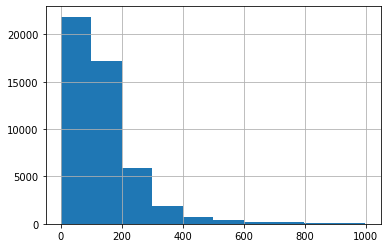

In [51]:
df_price_less_1k.price.hist()

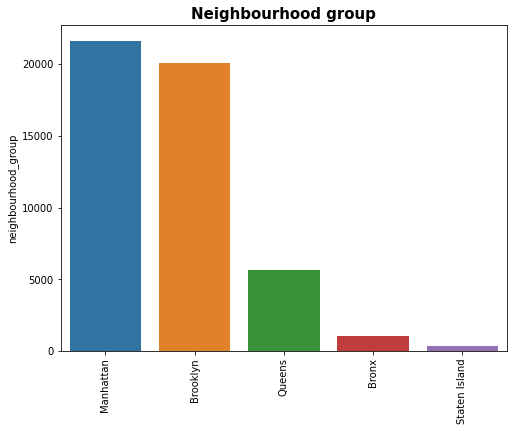

Manhattan        21652
Brooklyn         20098
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [52]:
plt.figure(figsize=(8,6))
nb_neighbourhood = df.neighbourhood_group.value_counts()
chart = sns.barplot(x=nb_neighbourhood.index, y=nb_neighbourhood)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Neighbourhood group',size=15, weight='bold')

plt.show()
print(df.neighbourhood_group.value_counts())

In [53]:
# Average price in neighbourhood group
price_ne_group = pd.pivot_table(df, index = 'neighbourhood_group', values = 'price').sort_values('price', ascending = False)
price_ne_group

,price
neighbourhood_group,
Manhattan,196.877425
Brooklyn,124.395711
Staten Island,114.812332
Queens,99.517649
Bronx,87.457798


Graph for average price per neighbourhood: total = 10


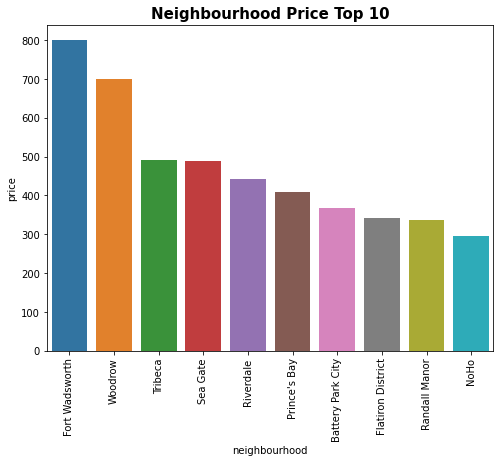

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.086957
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


In [76]:
# Top 10 highest average price in neighbourhoods
price_neighbourhood = pd.pivot_table(df, index = 'neighbourhood', values = 'price').sort_values('price', ascending = False)

plt.figure(figsize=(8,6))
top_price_neighbourhood = price_neighbourhood[:10].squeeze()
print("Graph for %s: total = %d" % ('average price per neighbourhood', len(top_price_neighbourhood)))
chart = sns.barplot(x=top_price_neighbourhood.index, y=top_price_neighbourhood)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Neighbourhood Price Top 10',size=15, weight='bold')
plt.show()
print(top_price_neighbourhood)


In [91]:
# Number of airbnbs in this top 10 
df.neighbourhood.value_counts()[top_price_neighbourhood.index]

neighbourhood
Fort Wadsworth         1
Woodrow                1
Tribeca              177
Sea Gate               7
Riverdale             11
Prince's Bay           4
Battery Park City     69
Flatiron District     80
Randall Manor         19
NoHo                  78
Name: neighbourhood, dtype: int64

Graph for neighbourhoods: total = 10


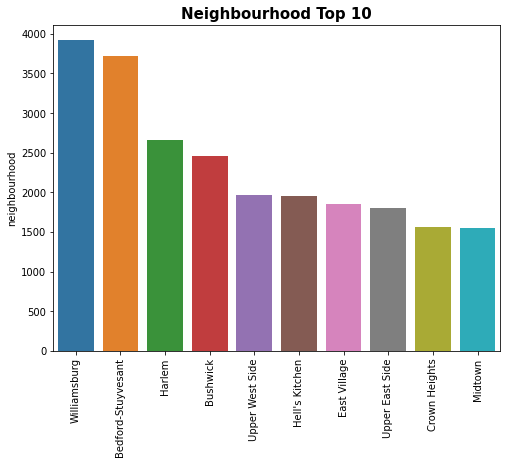

Williamsburg          3918
Bedford-Stuyvesant    3713
Harlem                2657
Bushwick              2463
Upper West Side       1970
Hell's Kitchen        1957
East Village          1852
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


In [78]:
# Top 10 number of airbnbs in neighbourhoods
plt.figure(figsize=(8,6))
top_nb_neighbourhood = df.neighbourhood.value_counts()[:10]
print("Graph for %s: total = %d" % ('neighbourhoods', len(top_nb_neighbourhood)))
chart = sns.barplot(x=top_nb_neighbourhood.index, y=top_nb_neighbourhood)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Neighbourhood Top 10',size=15, weight='bold')
plt.savefig('neighbourhood.png')
plt.show()
print(top_nb_neighbourhood)